In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(1)

# diabetes 데이터

# a) 데이터 로드 및 처리

In [45]:
#데이터 로드
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [46]:
"""
    sklearn에 있는 당뇨병 진행도 데이터를 사용

    <변수>
    Age
    Sex
    Body mass index
    Average blood pressure
    S1 : 혈청에 대한 6가지 지표들
    S2
    S3
    S4
    S5
    S6
    
    *데이터가 각 컬럼의 합이 1이 되도록 centering, scaling됨

    <데이터>
    diabetes에 data(설명변수), target(종속변수) 데이터가 따로 있음
"""

'\n    sklearn에 있는 당뇨병 진행도 데이터를 사용\n\n    <변수>\n    Age\n    Sex\n    Body mass index\n    Average blood pressure\n    S1 : 혈청에 대한 6가지 지표들\n    S2\n    S3\n    S4\n    S5\n    S6\n    \n    *데이터가 각 컬럼의 합이 1이 되도록 centering, scaling됨\n\n    <데이터>\n    diabetes에 data(설명변수), target(종속변수) 데이터가 따로 있음\n'

In [47]:
#설명변수
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [48]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [49]:
#array형으로 되어있으므로 다루기 쉽게 데이터프레임으로 바꿔준다.
df_x = pd.DataFrame(diabetes.data)
df_x.columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']
df_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [50]:
#종속변수
df_y = pd.DataFrame(diabetes.target, columns=['target'])
df_y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [51]:
df = pd.concat([df_x,df_y],axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [52]:
#442개의 관측치와 10개의 설명변수, 1개의 타겟변수로 이루어져있다.
df.shape

(442, 11)

# b) EDA

In [53]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [11]:
"""
    age: 이산형
    sex: 범주형(명목형)
    bmi: 연속형
    bp:  연속형
    s1~6:연속형
"""

'\n    age: 이산형\n    sex: 범주형(명목형)\n    bmi: 연속형\n    bp:  연속형\n    s1~6:연속형\n'

# <과제>

이산형 데이터의 unique한 값이 58개 밖에 없는데, 이를 적절하게 인코딩해보세요!

이 변수 그대로 사용해도 되고, 또는 (정확한 나이는 모르지만 ) 나이별 인코딩을 할 수 있을거에요 

In [12]:
"""순서형 인코딩 과제"""


'순서형 인코딩 과제'

In [54]:
#명목형 인코딩
s_dummy = pd.get_dummies(df.sex, columns=['sex0','sex1'])
s_dummy.columns=['sex0','sex1']
s_dummy.head()

,sex0,sex1
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [55]:
df.drop(['sex'], axis=1, inplace=True)

In [56]:
df = pd.concat([df, s_dummy],axis=1)
df.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target,sex0,sex1
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,1,0


In [57]:
df_x = df.drop(['target'],axis=1)
df_y = pd.DataFrame(df['target'],columns=['target'])

In [58]:
print(df_x.columns.values)
print(df_y.columns.values)

['age' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'sex0' 'sex1']
['target']


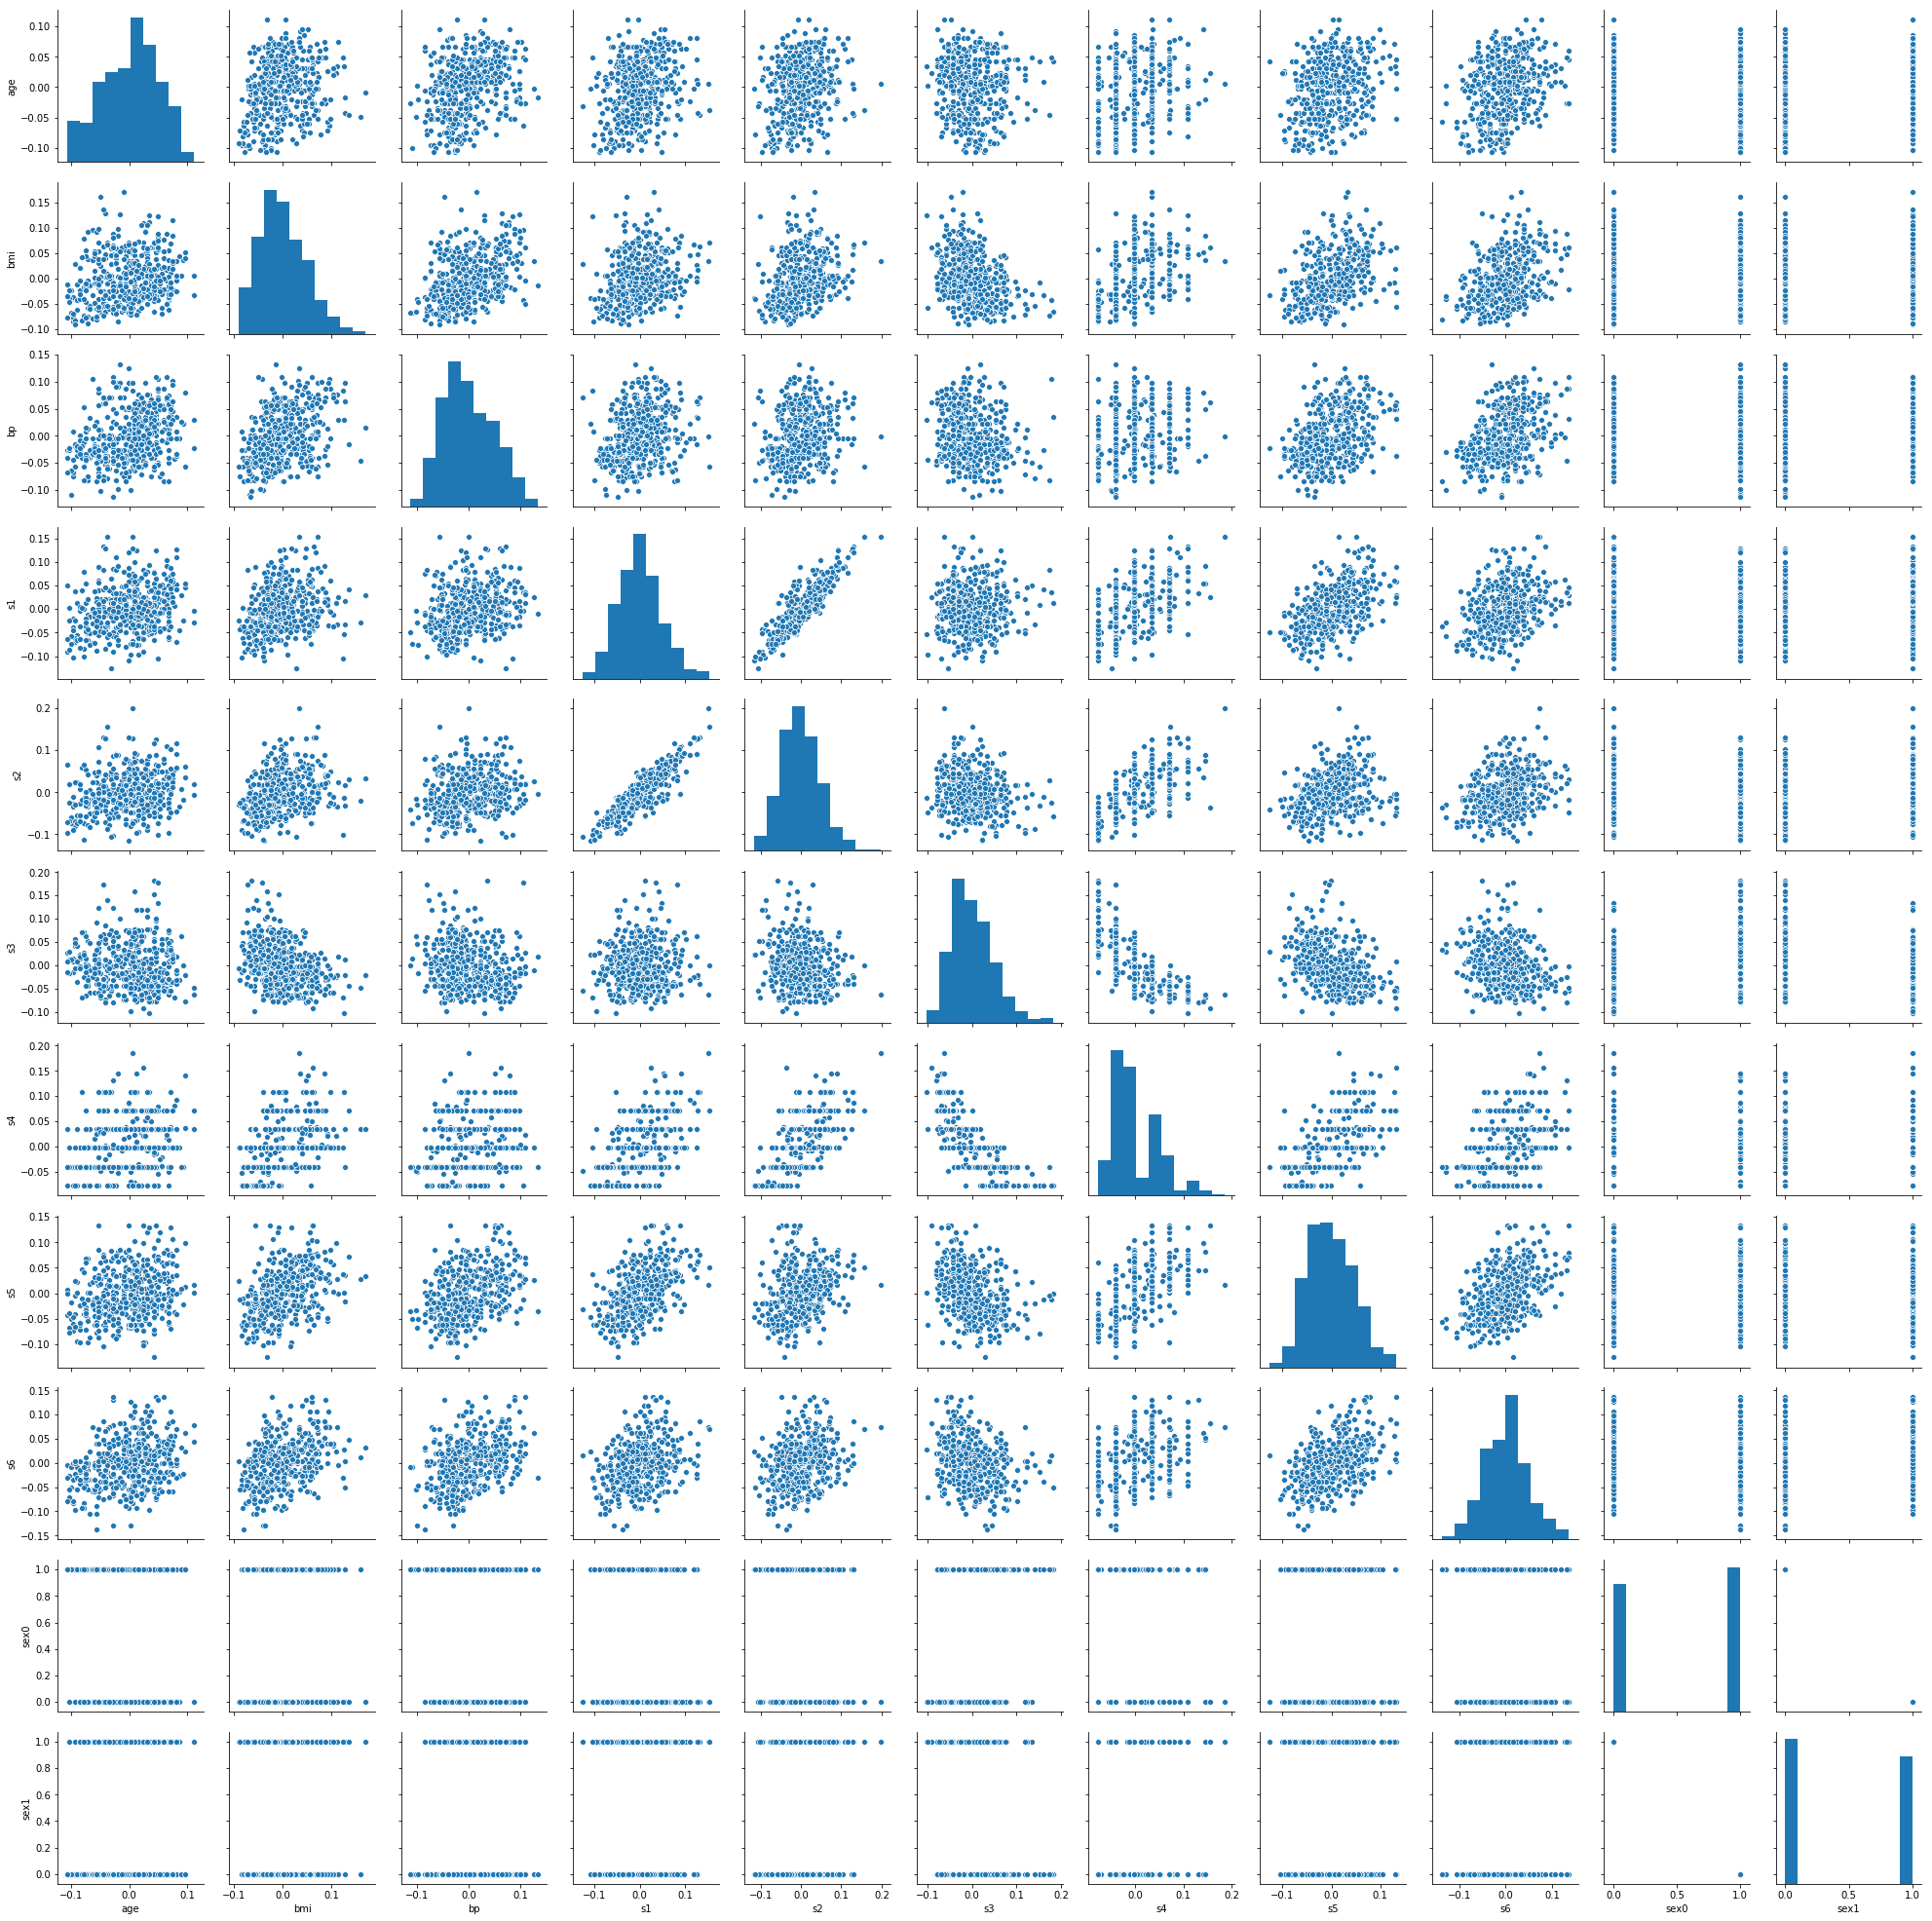

In [59]:
#산점도 행렬
sns.pairplot(df_x)

# s1과 s2의 선형관계가 두드러짐!(다른 s변수들도 살짝 보임)
# s4변수가 이상하게 줄무늬가 보인다
# s4변수의 특성으로 특정 구간의 시작(끝)에 많을 수도 있고, 데이터 기입의 오류일 수도 있겠다

In [60]:
#상관계수 행렬
df_x.corr()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex0,sex1
age,1.000000,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,-0.173737,0.173737
bmi,0.185085,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,-0.088161,0.088161
bp,0.335427,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,-0.241013,0.241013
s1,0.260061,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,-0.035277,0.035277
s2,0.219243,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,-0.142637,0.142637
s3,-0.075181,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,0.379090,-0.379090
s4,0.203841,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,-0.332115,0.332115
s5,0.270777,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,-0.149918,0.149918
s6,0.301731,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,-0.208133,0.208133
sex0,-0.173737,-0.088161,-0.241013,-0.035277,-0.142637,0.379090,-0.332115,-0.149918,-0.208133,1.000000,-1.000000


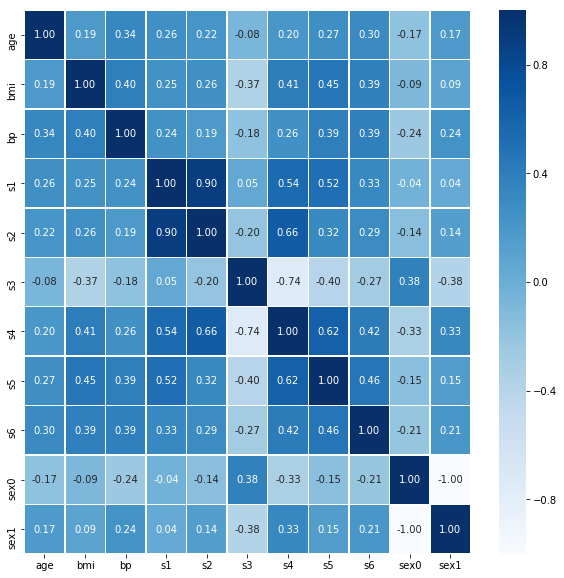

In [61]:
#상관계수 행렬
plt.figure(figsize=(10,10))
sns.heatmap(data = df_x.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [62]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_x.values, i) for i in range(df_x.shape[1])]
vif["features"] = df_x.columns
vif.sort_values(["VIF Factor"], ascending=[False])

#s1, s2, s3, s5의 vif가 10이상이므로 다중공선성이 있다고 판단된다.

,VIF Factor,features
3,59.203786,s1
4,39.194379,s2
5,15.402352,s3
7,10.076222,s5
6,8.890986,s4
1,1.509446,bmi
8,1.484623,s6
2,1.459429,bp
0,1.217307,age
10,1.147844,sex1


In [21]:
"""
    다중공선성 의심 변수: s1, s2, s3, s5
    이 변수들을 삭제할 수도 있고, 일부만 제거할 수도 있음
"""

'\n    다중공선성 의심 변수: s1, s2, s3, s5\n    이 변수들을 삭제할 수도 있고, 일부만 제거할 수도 있음\n'

# c) Modeling

In [85]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

In [86]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
#fit된 모델의 R-square
model.score(X_train, y_train)

0.5539285357415584

In [88]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

2734.729272403143

In [89]:
print(model.coef_) #추정된 회귀계수(intercept제외)
print(model.intercept_) #intercept

[[ -35.55683674  562.75404632  305.47203008 -662.78772128  324.27527477
    24.78193291  170.33056502  731.67810787   43.02846824   11.58965875
   -11.58965875]]
[151.80394699]


In [27]:
#test데이터 예측
model.predict(X_test)

array([[238.47145247],
       [248.93170646],
       [164.05404165],
       [120.30794355],
       [187.42422054],
       [259.04865002],
       [113.55556372],
       [188.07597044],
       [149.49663441],
       [236.01099949],
       [172.24629506],
       [178.88073764],
       [109.15751983],
       [ 92.13508975],
       [243.33042043],
       [ 87.356971  ],
       [155.72606406],
       [ 66.99073989],
       [100.42610442],
       [218.09422877],
       [196.66287912],
       [161.29832968],
       [161.70779605],
       [156.52520454],
       [197.88796516],
       [167.57984206],
       [120.74478913],
       [ 84.83879727],
       [192.03728687],
       [160.60687024],
       [175.17178362],
       [ 84.22833237],
       [145.7995542 ],
       [145.97333493],
       [140.96488953],
       [197.00421108],
       [165.94322494],
       [190.65906468],
       [128.22520508],
       [206.41941223],
       [ 84.35851196],
       [164.0256504 ],
       [144.1056776 ],
       [184

In [28]:
#test데이터 R-square
model.score(X_test, y_test)

0.3322220326906511

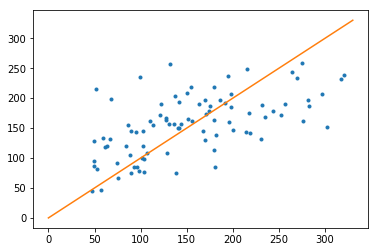

In [29]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [30]:
"""
    MSE: 2738
    train R-square: 0.55
    test R-square: 0.33
"""

'\n    MSE: 2738\n    train R-square: 0.55\n    test R-square: 0.33\n'

In [31]:
#다중공선성이 제일 큰 변수를 제거하고 다시하기
df2 = df.drop(['s1'],axis=1)
df2.head()

,age,bmi,bp,s2,s3,s4,s5,s6,target,sex0,sex1
0,0.038076,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,0,1
1,-0.001882,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,1,0
2,0.085299,0.044451,-0.005671,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0,1
3,-0.089063,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1,0
4,0.005383,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,1,0


In [32]:
df2_x = df2.drop(['target'], axis=1)
df2_y = pd.DataFrame(df2['target'],columns=['target'])
df2_x.head()

,age,bmi,bp,s2,s3,s4,s5,s6,sex0,sex1
0,0.038076,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0,1
1,-0.001882,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1,0
2,0.085299,0.044451,-0.005671,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0,1
3,-0.089063,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022692,-0.009362,1,0
4,0.005383,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031991,-0.046641,1,0


In [33]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2_x, df2_y, test_size=0.2, random_state=0)

In [34]:
#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)
#fit된 모델의 R-square
model.score(X_train, y_train)

0.5509511284994073

In [35]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

2752.9828559505945

In [36]:
#test데이터 R-square
model.score(X_test, y_test)

0.3235080332827156

In [37]:
"""
    MSE: 2752
    train R-square: 0.55
    test R-square: 0.32
"""

'\n    MSE: 2752\n    train R-square: 0.55\n    test R-square: 0.32\n'

In [45]:
"""
    다중공선성이 가장 큰 S1변수를 제거하고 회귀한 결과,
    기존의 MSE, train R-square, test R-square과 거의 비슷하므로
    굳이 이 변수를 사용할 필요가 없다.
    
    하지만 모델의 accuracy를 높이는게 가장 큰 목적이면
    이 변수도 사용해서 정확도를 높이는게 좋다.
"""

'\n    다중공선성이 가장 큰 S1변수를 제거하고 회귀한 결과,\n    기존의 MSE, train R-square, test R-square과 거의 비슷하므로\n    굳이 이 변수를 사용할 필요가 없다.\n    \n    하지만 모델의 accuracy를 높이는게 가장 큰 목적이면\n    이 변수도 사용해서 정확도를 높이는게 좋다.\n'

In [38]:
#Ridge, Lasso 회귀
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)#alpha: 얼마나 정규화를 할건지 정하는 양수 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)>

In [40]:
#R-square
ridge.score(X_train,y_train)

0.4724942595995213

In [41]:
#정규화를 덜하니까 R-square가 오히려 증가했다.
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)

0.5337782773542921

In [42]:
#Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.5275861106431707

In [44]:
"""
    정규화를 많이하니까 오히려 R-square가 감소했다.
    overfitting의 문제는 아니고, 모델이 단순해서 설명력이 부족한 것같다.
    더 복잡한 모델(다항회귀, DT 등)이 필요해보인다.
"""

'\n    정규화를 많이하니까 오히려 R-square가 감소했다.\n    overfitting의 문제는 아니고, 모델이 단순해서 설명력이 부족한 것같다.\n    더 복잡한 모델(다항회귀, DT 등)이 필요해보인다.\n'

In [ ]:
"""
    <reference>
    https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial
"""